In [1]:
# import de tous les modules nécessaires à la réalisation du TP
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

### Exercice 1: récupération des données avec pandas

In [2]:
# définition de l'url où récupérer les données
url = 'https://bitbucket.org/portierf/shared_files/downloads/Galton.txt'
# utilisation de la commande pandas read_csv pour passer les données dans une dataframe
data = pd.read_csv(url, sep='\t')

### Exercice 2: création d'une colonne supplémentaire

In [3]:
# calcul de la colonne à inclure
col = 0.5*(data.Father + 1.08*data.Mother)
# inclusion dans le dataframe, en dernière position, sous le nom "MeanParents"
data.insert(6, "MeanParents", col)

### Exercice 3: traçage du nuage de points

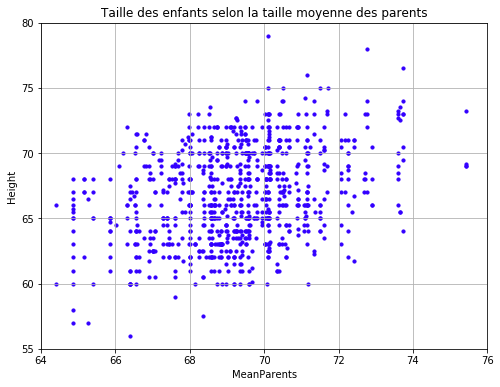

In [4]:
# traçage du nuage de points avec la commande scatter
fig_1 = plt.figure(figsize=(8,6))
plt.scatter(data.MeanParents,data.Height, s=10, c=np.array([[0.2, 0, 1]]))
plt.title('Taille des enfants selon la taille moyenne des parents')
plt.xlabel('MeanParents')
plt.ylabel('Height')
plt.ylim(55,80) 
plt.xlim(64,76)
plt.grid(True)
plt.show()

### Exercice 4: estimation de $\hat{\theta}_0$ et $\hat{\theta}_1$

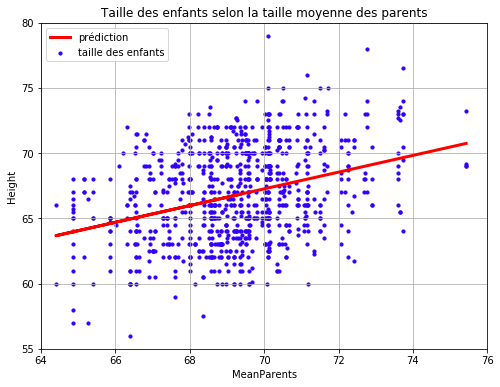

In [5]:
# conversion des données du format dataframe au format array de numpy (nécessaire pour utiliser scikit-learn)
X = data["MeanParents"].to_numpy().reshape(-1,1)
y = data["Height"].to_numpy().reshape(-1,1)
# formulation du modèle linéaire
reg = linear_model.LinearRegression(fit_intercept=True)
# estimation du modèle
reg.fit(X,y)
# extraction des coefficients
theta_0 = reg.intercept_[0]
theta_1 = reg.coef_[0][0]
# estimation de la prédiction
pred = reg.predict(X)
# traçage du nuage de points
fig_2 = plt.figure(figsize=(8,6))
plt.scatter(data.MeanParents,data.Height, s=10, c=np.array([[0.2, 0, 1]]), label = 'taille des enfants')
plt.title('Taille des enfants selon la taille moyenne des parents')
plt.xlabel('MeanParents')
plt.ylabel('Height')
plt.ylim(55,80) 
plt.xlim(64,76)
plt.grid(True)
# traçage de la prévision
plt.plot(X, pred, color=(1, 0, 0), linewidth=3, label = 'prédiction')
plt.legend()
plt.show()




### Exercice 5: Recentrage des données

On notera que:

$\tilde{Y}=\tilde{X} \tilde{\theta}$

$\leftrightarrow (Y-\bar{Y})=(X-\bar{X}) \tilde{\theta}$

$\leftrightarrow Y=(\bar{Y}-\bar{X} \tilde{\theta})+ X \tilde{\theta}$

Comme le modèle linéaire non-centré est:

$Y=\theta_0 + X \theta_1$

Les deux modèles ne seront équivalents que si:

1/ $\theta_0=\bar{Y}-\bar{X} \tilde{\theta} \hspace{5mm}$     et $\hspace{5mm}$ 2/ $\theta_1=\tilde{\theta}$

C'est ce qu'on vérifiera dans la question. On vérifiera aussi que les prédictions fournies par les deux modèles sont similaires.

In [6]:
# recentrage de y
y_c = y - np.mean(y)
# recentrage de X
X_c = X - np.mean(X)
# formulation du modèle linéaire centré (sans constante)
reg_c = linear_model.LinearRegression(fit_intercept=False)
# estimation du modèle
reg_c.fit(X_c,y_c)

# comparaison des coefficients

# pente du modèle centré
theta_tilde = reg_c.coef_[0][0]
# coefficient de la constante obtenu par équivalence avec le modèle standard (voir 1/ ci-dessus)
theta_0c = np.mean(y)-np.mean(X)*theta_tilde
# coefficient de la pente obtenu par équivalence avec le modèle standard (voir 2/ ci-dessus)
theta_1c = theta_tilde
# affichage des résultats
print("La constante du modèle normal est de " + str(round(theta_0, 3)))
print("La constante du modèle centré est de " + str(round(theta_0c, 3)))
print("La pente du modèle normal est de " + str(round(theta_1, 3)))
print("La pente du modèle centré est de " + str(round(theta_1c, 3)))

# comparaison des prévisions
# calcul de la prévision avec les coefficients obtenus par le modèle centré
pred_c = theta_0c + X*theta_1c
# comparaison des prévisions du modèle normal et du modèle centré
# on utilise la fonction numpy allclose, qui determine si deux series de données sont égales et renvoie un booléen
print( 'La fonction allclose renvoie: "' + str(np.allclose(pred,pred_c)) + '" lorsqu\'on lui demande si les prédictions des deux modèles sont similaires.' )

La constante du modèle normal est de 22.376
La constante du modèle centré est de 22.376
La pente du modèle normal est de 0.641
La pente du modèle centré est de 0.641
La fonction allclose renvoie: "True" lorsqu'on lui demande si les prédictions des deux modèles sont similaires.


On constate que les deux modèles permettent de recouvrer les mêmes valeurs de coefficients, et qu'ils produisent les mêmes prévisions.

### Exercice 6: visualisation des résidus

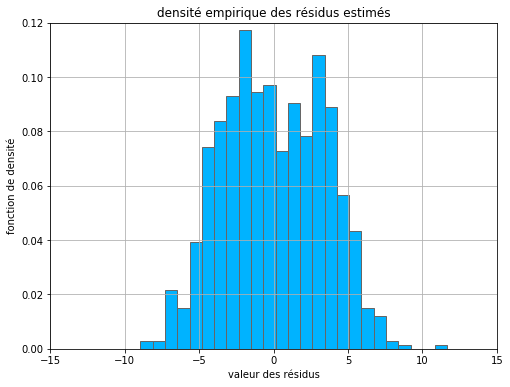

In [7]:
# calcul des résidus du modèle normal
res = y - pred

# traçage de l'histogramme des résidus
fig3 = plt.figure(figsize=(8,6))
plt.hist(res, bins = 25, density = True, color = (0, 0.7, 1), edgecolor=(0.4, 0.4, 0.4))
plt.xlabel('valeur des résidus')
plt.ylabel('fonction de densité')
plt.title('densité empirique des résidus estimés')
plt.ylim(0,0.12) 
plt.xlim(-15, 15)
plt.grid(True)
plt.show()

L'hypothèse de normalité des résidus n'est pas crédible. La distribution est clairement bimodale (elle montre deux pics, un autour de -2, l'autre autour de 3), alors que la distribution normale n'a qu'un mode unique au centre de la distribution. On peut sans aucun doute ici rejeter l'hypothèse de normalité.

### Exercice 7: distinction filles et garçons

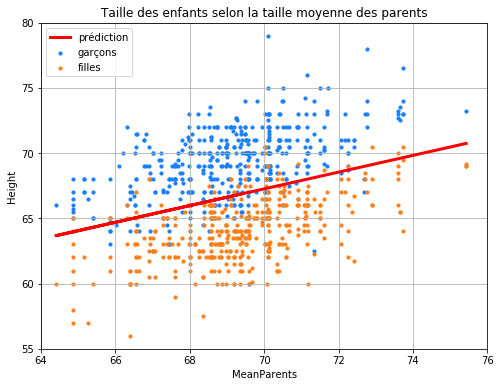

In [8]:
# création d'un sous-dataframe qui ne retient que les garçons
data_gar = data[data["Gender"]=='M'].copy()
# création d'un sous-dataframe qui ne retient que les filles
data_fil = data[data["Gender"]=='F'].copy()
# traçage du graphique avec droite de prédiction, et filles et garçons séparés
fig4 = plt.figure(figsize=(8,6))
# traçage du nuage de points des garçons
plt.scatter(data_gar.MeanParents,data_gar.Height, s=10, c=np.array([[0.1, 0.5, 1]]), label = 'garçons')
# traçage du nuage de points des filles
plt.scatter(data_fil.MeanParents,data_fil.Height, s=10, c=np.array([[1, 0.5, 0.1]]), label = 'filles')
plt.title('Taille des enfants selon la taille moyenne des parents')
plt.xlabel('MeanParents')
plt.ylabel('Height')
plt.ylim(55,80) 
plt.xlim(64,76)
plt.grid(True)
# traçage de la prévision
plt.plot(X, pred, color=(1, 0, 0), linewidth=3, label = 'prédiction')
plt.legend()
plt.show()

On observe clairement deux catégories distinctes sur le graphique: les garçons qui ont des valeurs élevées en moyenne, et les filles qui ont en moyenne des valeurs plus basses. Lorsque l'on fait une regression en combinant les données des deux groupes, on obtient une prédiction qui n'est adaptée ni à l'un, ni à l'autre, ce qui explique la distribution bimodale observée à la question précédente. La prévision pour les garçons tend à être systématiquement trop basse, ce qui génère des résidus essentiellement positifs. Cela explique le mode de la distribution autour de 3. A l'inverse, les prévisions pour les filles tendent à être systématiquement trop hautes, ce qui génère des résidus essentiellement négatifs. Cela explique le second mode de la distribution autour de -2.

### Exercice 8: régression sur le groupe des garçons

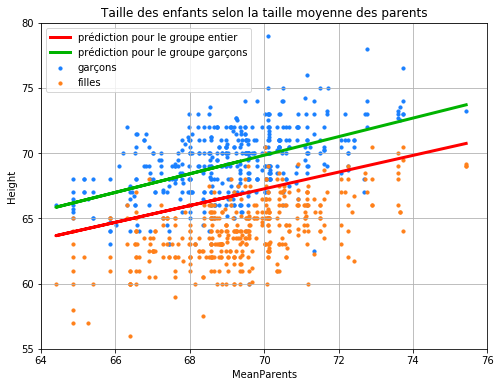

In [23]:
# création du sous-dataframe ne prenant en compte que les garçons
X_gar = data_gar["MeanParents"].values.reshape(-1,1)
y_gar = data_gar["Height"].values.reshape(-1,1)
# formulation et entraînement du modèle spécifique aux garçons
reg_gar = linear_model.LinearRegression(fit_intercept=True)
reg_gar.fit(X_gar,y_gar)
pred_gar = reg_gar.predict(X_gar)
# traçage du graphique
fig5 = plt.figure(figsize=(8,6))
# traçage du nuage de points des garçons
plt.scatter(data_gar.MeanParents,data_gar.Height, s=10, c=np.array([[0.1, 0.5, 1]]), label = 'garçons')
# traçage du nuage de points des filles
plt.scatter(data_fil.MeanParents,data_fil.Height, s=10, c=np.array([[1, 0.5, 0.1]]), label = 'filles')
plt.title('Taille des enfants selon la taille moyenne des parents')
plt.xlabel('MeanParents')
plt.ylabel('Height')
plt.ylim(55,80) 
plt.xlim(64,76)
plt.grid(True)
# traçage de la prévision pour le groupe entier
plt.plot(X, pred, color=(1, 0, 0), linewidth=3, label = 'prédiction pour le groupe entier')
# traçage de la prévision pour le groupe des garçons
plt.plot(X_gar, pred_gar, color=(0, 0.7, 0), linewidth=3, label = 'prédiction pour le groupe garçons')
plt.legend()
plt.show()

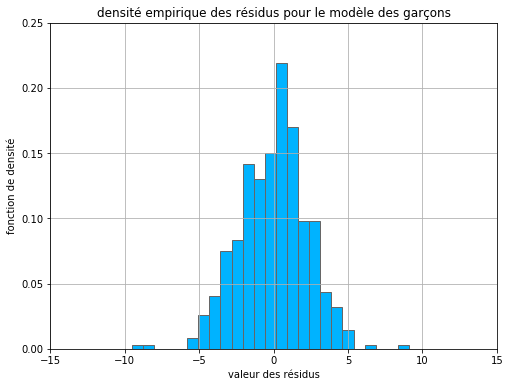

In [10]:
# calcul des résidus du modèle des garçons
res_gar = y_gar - pred_gar

# traçage de l'histogramme des résidus
fig6 = plt.figure(figsize=(8,6))
plt.hist(res_gar, bins = 25, density = True, color = (0, 0.7, 1), edgecolor=(0.4, 0.4, 0.4))
plt.xlabel('valeur des résidus')
plt.ylabel('fonction de densité')
plt.title('densité empirique des résidus pour le modèle des garçons')
plt.ylim(0,0.25) 
plt.xlim(-15, 15)
plt.grid(True)
plt.show()


On note que l'hypothèse de normalité devient beaucoup crédible. La distribution obtenue est maintenant unimodale et sa forme s'approche de la forme en cloche caractéristique de la distribution normale. Cela résulte de la séparation du groupe des garçons d'avec celui des filles, qui permet d'obtenir un modèle où les prédictions ne sont plus influencées par l'impact de l'autre groupe.

### Exercice 9: partitionnement aléatoire de l'échantillon

In [11]:
# construction de l'échantillonage aléatoire: mélange des lignes du dataset
data_mel = data.sample(frac=1, random_state=0).copy()
# selection de 80% du dataset généré pour l'échantillon d'apprentissage
data_app = data_mel[:round(0.8*len(data_mel))]
# selection des 20% restants pour l'échantillon de test
data_test = data_mel[round(0.8*len(data_mel)):]
# selection des garçons uniquement sur l'échantillon d'apprentissage
data_app_gar = data_app[data_app["Gender"]=='M'].copy()
# selection des garçons uniquement sur l'échantillon de test
data_test_gar = data_test[data_test["Gender"]=='M'].copy()

# création du sous-dataframe pour l'échantillon d'apprentissage entier
X_app = data_app["MeanParents"].values.reshape(-1,1)
y_app = data_app["Height"].values.reshape(-1,1)
# estimation du modèle sur l'échantillon d'apprentissage entier
reg_app = linear_model.LinearRegression(fit_intercept=True)
reg_app.fit(X_app,y_app)

# création du sous-dataframe pour la partie garçon de l'échantillon d'apprentissage
X_app_gar = data_app_gar["MeanParents"].values.reshape(-1,1)
y_app_gar = data_app_gar["Height"].values.reshape(-1,1)
# estimation du modèle garçon sur l'échantillon d'apprentissage
reg_app_gar = linear_model.LinearRegression(fit_intercept=True)
reg_app_gar.fit(X_app_gar,y_app_gar)

# création du sous-dataframe pour le groupe garçons de l'échantillon test
X_test_gar = data_test_gar["MeanParents"].values.reshape(-1,1)
y_test_gar = data_test_gar["Height"].values.reshape(-1,1)
# obtention des prédictions sur l'échantillon test avec le modèle entier
pred_test_gar_ent = reg_app.predict(X_test_gar)
# obtention des prédictions sur l'échantillon test avec le modèle du groupe garçon
pred_test_gar = reg_app_gar.predict(X_test_gar)

# calcul du risque de prédiction pour le modèle avec échantillon complet
rp_gar_ent = np.sum((y_test_gar-pred_test_gar_ent)**2)/len(y_test_gar)
# calcul du risque de prédiction pour le modèle du groupe garçon
rp_gar = np.sum((y_test_gar-pred_test_gar)**2)/len(y_test_gar)
# affichage des résultats
print("Le risque de prédiction pour le modèle de l'échantillon complet est de " + str(round(rp_gar_ent,2)) + ".")
print("Le risque de prédiction pour le modèle du groupe des garçons est de " + str(round(rp_gar,2)) + ".")

Le risque de prédiction pour le modèle de l'échantillon complet est de 12.49.
Le risque de prédiction pour le modèle du groupe des garçons est de 6.75.


On constate que le risque de prédiction pour les garçons est réduit de moitié environ lorsqu'on estime le modèle sur l'échantillon réduit aux garçons, par rapport au modèle estimé sur l'échantillon entier. Utiliser le bon échantillon a donc un impact positif significatif sur la qualité de la prédiction.

### Exercice 10: prédicteur combiné filles / garçons

In [12]:
# on procède de manière similaire à la question 9, mais maintenant avec le groupe des filles

# selection des garçons uniquement sur l'échantillon d'apprentissage
data_app_fil = data_app[data_app["Gender"]=='F'].copy()
# selection des garçons uniquement sur l'échantillon de test
data_test_fil = data_test[data_test["Gender"]=='F'].copy()

# création du sous-dataframe pour la partie filles de l'échantillon d'apprentissage
X_app_fil = data_app_fil["MeanParents"].values.reshape(-1,1)
y_app_fil = data_app_fil["Height"].values.reshape(-1,1)
# estimation du modèle sur l'échantillon d'apprentissage entier
reg_app_fil = linear_model.LinearRegression(fit_intercept=True)
reg_app_fil.fit(X_app_fil,y_app_fil)

# création du sous-dataframe pour le groupe filles de l'échantillon test
X_test_fil = data_test_fil["MeanParents"].values.reshape(-1,1)
y_test_fil = data_test_fil["Height"].values.reshape(-1,1)
# obtention des prédictions sur l'échantillon test avec le modèle entier
pred_test_fil_ent = reg_app.predict(X_test_fil)
# obtention des prédictions sur l'échantillon test avec le modèle du groupe fille
pred_test_fil = reg_app_fil.predict(X_test_fil)

# calcul du risque predictif pour le modèle des filles
rp_fil = np.sum((y_test_fil-pred_test_fil)**2)/len(y_test_fil)
# calcul du risque prédictif combiné, qui rassemble en un échantillon unique filles et garçons
# mais utilise les prédictions obtenues par leur modèles respectifs
rp_comb = (np.sum((y_test_gar-pred_test_gar)**2)+np.sum((y_test_fil-pred_test_fil)**2))/(len(y_test_gar)+len(y_test_fil))

print("Le risque de prédiction pour le modèle garçons est de " + str(round(rp_gar,2)) + ".")
print("Le risque de prédiction pour le modèle filles est de " + str(round(rp_fil,2)) + ".")
print("Le risque de prédiction pour le modèle global adapté au genre est de " + str(round(rp_comb,2)) + ".")


Le risque de prédiction pour le modèle garçons est de 6.75.
Le risque de prédiction pour le modèle filles est de 4.39.
Le risque de prédiction pour le modèle global adapté au genre est de 5.61.


### Exercice 11: encodage booléen

In [13]:
# on crée d'abord un sélecteur booléen pour garçons et filles (converti au format numpy ndarray)
sb_gar=(data_test["Gender"]=='M').astype(int).values.reshape(-1,1)
sb_fil=(data_test["Gender"]=='F').astype(int).values.reshape(-1,1)

# on crée d'abord les dataframes correspondant à l'échantillon test global
X_test = data_test["MeanParents"].values.reshape(-1,1)
y_test = data_test["Height"].values.reshape(-1,1)

# on crée ensuite une prédiction pour l'échantillon test entier avec chacun des deux modèles garçon et fille
pred_gar_ent = reg_app_gar.predict(X_test)
pred_fil_ent = reg_app_fil.predict(X_test)

# on filtre la prédiction en booléen pour ne garder que la prédiction correspondant au modèle garçon/fille
pred_test_gf = np.multiply(pred_gar_ent, sb_gar) + np.multiply(pred_fil_ent, sb_fil)

# on calcule aussi la prédiction pour l'échantillon test avec le modèle général, qui ne sépare pas filles et garçon
pred_test = reg_app.predict(X_test)

On procède maintenant au calcul du coefficient de détermination ou $R^2$. On rappelle la formule générale:

$$R^2=\frac{\sum_{i=1}^n (\hat{y}_i - \bar{y}_i)^2}{\sum_{i=1}^n (y_i - \bar{y}_i)^2}$$

où $\hat{y}_i$ dénote la prediction du modèle et $\bar{y}_i$ dénote la moyenne empirique des $y_i$. A noter qu'il existe une ambiguité sur cette formule pour le modèle estimé séparément sur les filles et les garçons. En effet, dans la formule générale, on compare la prédiction $\hat{y}_i$ à $\bar{y}_i$ qui est sa moyenne (voir poly sur ce point). Le $R^2$ n'a donc de sens que si on compare chaque prédiction avec la moyenne correspondante. Pour cette raison, il paraît préférable de comparer les prédictions pour les garçons avec la moyenne des garçons et les prédictions des filles avec la moyenne des filles. C'est cette approche qui sera retenue dans le calcul du $R^2$ pour le modèle séparant garçons et filles.

In [14]:
# calcul du R2 pour le modèle général
R2 = ((pred_test - y_test.mean())**2).sum() / ((y_test - y_test.mean())**2).sum()

# calcul du R2 pour le modèle garçons et filles séparés
R2_gf = (((pred_test_gar - y_test_gar.mean())**2).sum() + ((pred_test_fil - y_test_fil.mean())**2).sum()) / \
(((y_test_gar - y_test_gar.mean())**2).sum() + ((y_test_fil - y_test_fil.mean())**2).sum())

# affichage des résultats
print("Le coefficient de détermination pour le modèle général est d'environ " + str(round(R2, 3)) + ".")
print("Le coefficient de détermination pour le modèle séparant garçons et filles est d'environ " + str(round(R2_gf, 3)) + ".")

Le coefficient de détermination pour le modèle général est d'environ 0.095.
Le coefficient de détermination pour le modèle séparant garçons et filles est d'environ 0.235.


On remarque que le modèle qui sépare garçons et filles obtient une nettement meilleure performance que le modèle général puisqu'il explique près de 2,5 fois plus de la variance totale des données (23,5% contre 9,5%). La séparation de l'échantillon entre garçons et filles praâit donc particulièrement pertinante pour améliorer les performances prédictives du modèle.

### Exercice 12: régression linéaire multiple

On note d'abord qu'il y a une ambiguité dans l'énoncé, qui ne précise pas si le modèle de cette question doit être estimé sur l'échantillon total ou seulement sur l'échantillon d'apprentissage. Dans la mesure où la question suivante demande une comparaison sur l'échantillon test, on garde une approche similaire à celle des questions 9 à 11 et estime le modèle sur l'échantillon d'apprentissage uniquement.

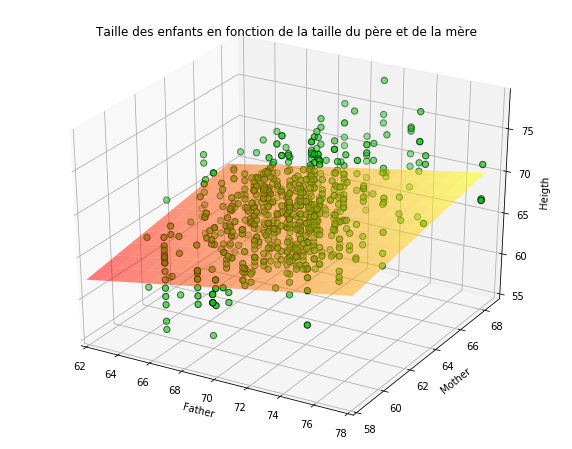

In [15]:
# création du sous-dataframe avec variables père et mère pour l'échantillon d'apprentissage
data_app_pm = data_app[['Father', 'Mother']].values
X_app_pm = data_app_pm

# estimation du modèle sur l'échantillon d'apprentissage entier
reg_app_pm = linear_model.LinearRegression(fit_intercept=True)
reg_app_pm.fit(X_app_pm,y_app)
# prédiction avec le modèle à deux variables
pred_app_pm = reg_app_pm.predict(X_app_pm)

# stockage des coefficients du modèle
coeffs = np.array([reg_app_pm.intercept_[0], reg_app_pm.coef_[0][0], reg_app_pm.coef_[0][1]])
# définition de l'équation du plan de régression
def f(x, y, coeffs):
    return coeffs[0] + x*coeffs[1] + y*coeffs[2]
# calcul du plan de prédiction
axe_pere = np.arange(62, 79, 1)
axe_mere = np.arange(58, 69, 1)
axe_pere, axe_mere = np.meshgrid(axe_pere, axe_mere)
pred_enfant = f(axe_pere, axe_mere, coeffs)

# création de la figure
fig7 = plt.figure(figsize=(10,8))
ax = fig7.add_subplot(projection='3d')
# traçage du plan de régression
ax.plot_surface(axe_pere, axe_mere, pred_enfant, cmap=cm.autumn, alpha=0.5)
# traçage du nuage de points
s = ax.scatter(X_app_pm[:,0], X_app_pm[:,1], y_app, s=40, c=np.array([[0, 0.8, 0]]), edgecolor = (0, 0, 0))
plt.title('Taille des enfants en fonction de la taille du père et de la mère')
ax.set_xlabel('Father')
ax.set_ylabel('Mother')
ax.set_zlabel('Heigth');
plt.xlim(62, 78)
plt.ylim(58, 69) 
plt.grid(True)
plt.show()



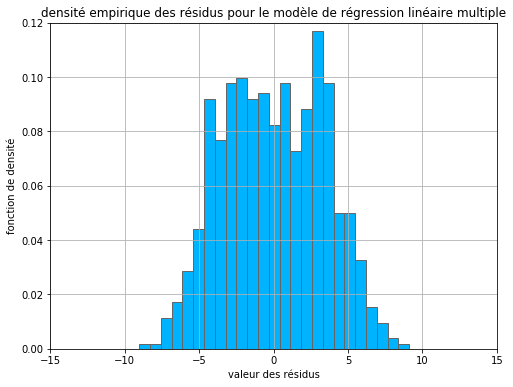

In [16]:
# calcul des résidus
res_pm = y_app - pred_app_pm

# traçage de l'histogramme des résidus
fig8 = plt.figure(figsize=(8,6))
plt.hist(res_pm, bins = 25, density = True, color = (0, 0.7, 1), edgecolor=(0.4, 0.4, 0.4))
plt.xlabel('valeur des résidus')
plt.ylabel('fonction de densité')
plt.title('densité empirique des résidus pour le modèle de régression linéaire multiple')
plt.ylim(0,0.12) 
plt.xlim(-15, 15)
plt.grid(True)
plt.show()

On observe que ce graphique est très similaire à celui obtenu à la question 6 pour le modèle avec la seule variable MeanParents. Le caractère bimodale de la distribution est encore clairement visible ici, ce qui suggére que le problème de non-séparation des garçons et des filles au sein de l'échantillon est toujours présent. Apparemment, séparer garçons et fille est plus important que de rajouter des features (comme ici, séparer le père et la mère au lieu d'utiliser seulement la moyenne), car cet ajout n'a pas eu d'effet notoire sur le problème de normalité des résidus. On se propose de confirmer cette conclusion à la prochaine question.

### Exercice 13: comparaison de performances

Dans cet exercice, on souhaite comparer la performance de deux modèles: celui qui contient uniquement la variable MeanParents, et celui qui comprend les deux variables Father et Mother. On estime les modèles sur l'échantillon d'apprentissage et les évalue sur l'échantillon de test. On évalue les performance selon deux métriques différentes: le risque de prédiction, et le coefficient de détermination.

In [17]:
# obtention des prédictions sur l'échantillon test pour le modèle avec MeanParents (estimé en question 9)
pred_test_mean = reg_app.predict(X_test)
# obtention des prédictions sur l'échantillon test pour le modèle avec Father et Mother (estimé en question 12)
data_test_pm = data_test[['Father', 'Mother']].values
X_test_pm = data_test_pm
pred_test_pm = reg_app_pm.predict(X_test_pm)

# calcul du risque de prédiction pour le modèle avec MeanParents
rp_mean = np.sum((y_test - pred_test_mean)**2)/len(y_test)
# calcul du risque de prédiction pour le modèle avec Father et Mother
rp_pm = np.sum((y_test - pred_test_pm)**2)/len(y_test)

# calcul du coefficient de détermination pour le modèle avec MeanParents
R2_mean = ((pred_test_mean - y_test.mean())**2).sum() / ((y_test - y_test.mean())**2).sum()
# calcul du coefficient de détermination pour le modèle avec MeanParents
R2_pm = ((pred_test_pm - y_test.mean())**2).sum() / ((y_test - y_test.mean())**2).sum()

# affichage des résultats
print("Le risque de prédiction pour le modèle avec MeanParents est d'environ " + str(round(rp_mean, 2)) + ".")
print("Le risque de prédiction pour le modèle avec Father et Mother est d'environ " + str(round(rp_pm, 2)) + ".")
print("")
print("Le coefficient de détermination pour le modèle avec MeanParents est d'environ " + str(round(R2_mean, 3)) + ".")
print("Le coefficient de détermination pour le modèle avec Father et Mother est d'environ " + str(round(R2_pm, 3)) + ".")


Le risque de prédiction pour le modèle avec MeanParents est d'environ 11.29.
Le risque de prédiction pour le modèle avec Father et Mother est d'environ 11.18.

Le coefficient de détermination pour le modèle avec MeanParents est d'environ 0.095.
Le coefficient de détermination pour le modèle avec Father et Mother est d'environ 0.098.


On observe que quel que soit le critère considéré, les deux modèles produisent des résultats virtuellement similaires. Un modèle avec deux variables explicatives ne semble ici pas être plus performant qu'un modèle avec un seul, tant en termes d'explication de la variance observée dans l'échantillon ($R^2$), qu'en termes de prédiction (risque de prédiction). Celà confirme, une fois de plus, que le critère déterminant pour ce modèle semble être la séparation de l'échantillon observé entre garçons et filles, bien plus que le nombre de feature utilisé pour expliquer les données.